# Mushroom Classification

<img src="dataset-cover.jpg">

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. 

# Columns :
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Steps: 
1. Importing Libraries

2. Loading the Dataset

3. Preprocessing

4. Data Visualizaton

5. Modelling (Logistics Regrssion, DecisionTree, RandomForest, XGboost, KNN, SVM)

# Importing Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [131]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing Dataset

In [132]:
# checking the missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [134]:
# to know the unique values of each column
for i in df.columns:
    print()
    print("**********************",i,"**********************")
    print(set(df[i].tolist()))
    print()


********************** class **********************
{'e', 'p'}


********************** cap-shape **********************
{'k', 'f', 'x', 's', 'b', 'c'}


********************** cap-surface **********************
{'f', 'y', 'g', 's'}


********************** cap-color **********************
{'e', 'n', 'p', 'y', 'w', 'g', 'b', 'c', 'u', 'r'}


********************** bruises **********************
{'t', 'f'}


********************** odor **********************
{'n', 'p', 'l', 'f', 'y', 'm', 's', 'c', 'a'}


********************** gill-attachment **********************
{'f', 'a'}


********************** gill-spacing **********************
{'w', 'c'}


********************** gill-size **********************
{'n', 'b'}


********************** gill-color **********************
{'e', 'k', 'n', 'p', 'y', 'w', 'h', 'g', 'o', 'b', 'u', 'r'}


********************** stalk-shape **********************
{'e', 't'}


********************** stalk-root **********************
{'e', '?', 'b', 'c', 'r'}

In [135]:
#filling the '?' in stalk-root column with the mode value 
df['stalk-root'] = np.where(df['stalk-root']=='?',df['stalk-root'].mode(),df['stalk-root'])

In [136]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [137]:
df.duplicated().sum()  # check the duplicate records

0

# Visualization

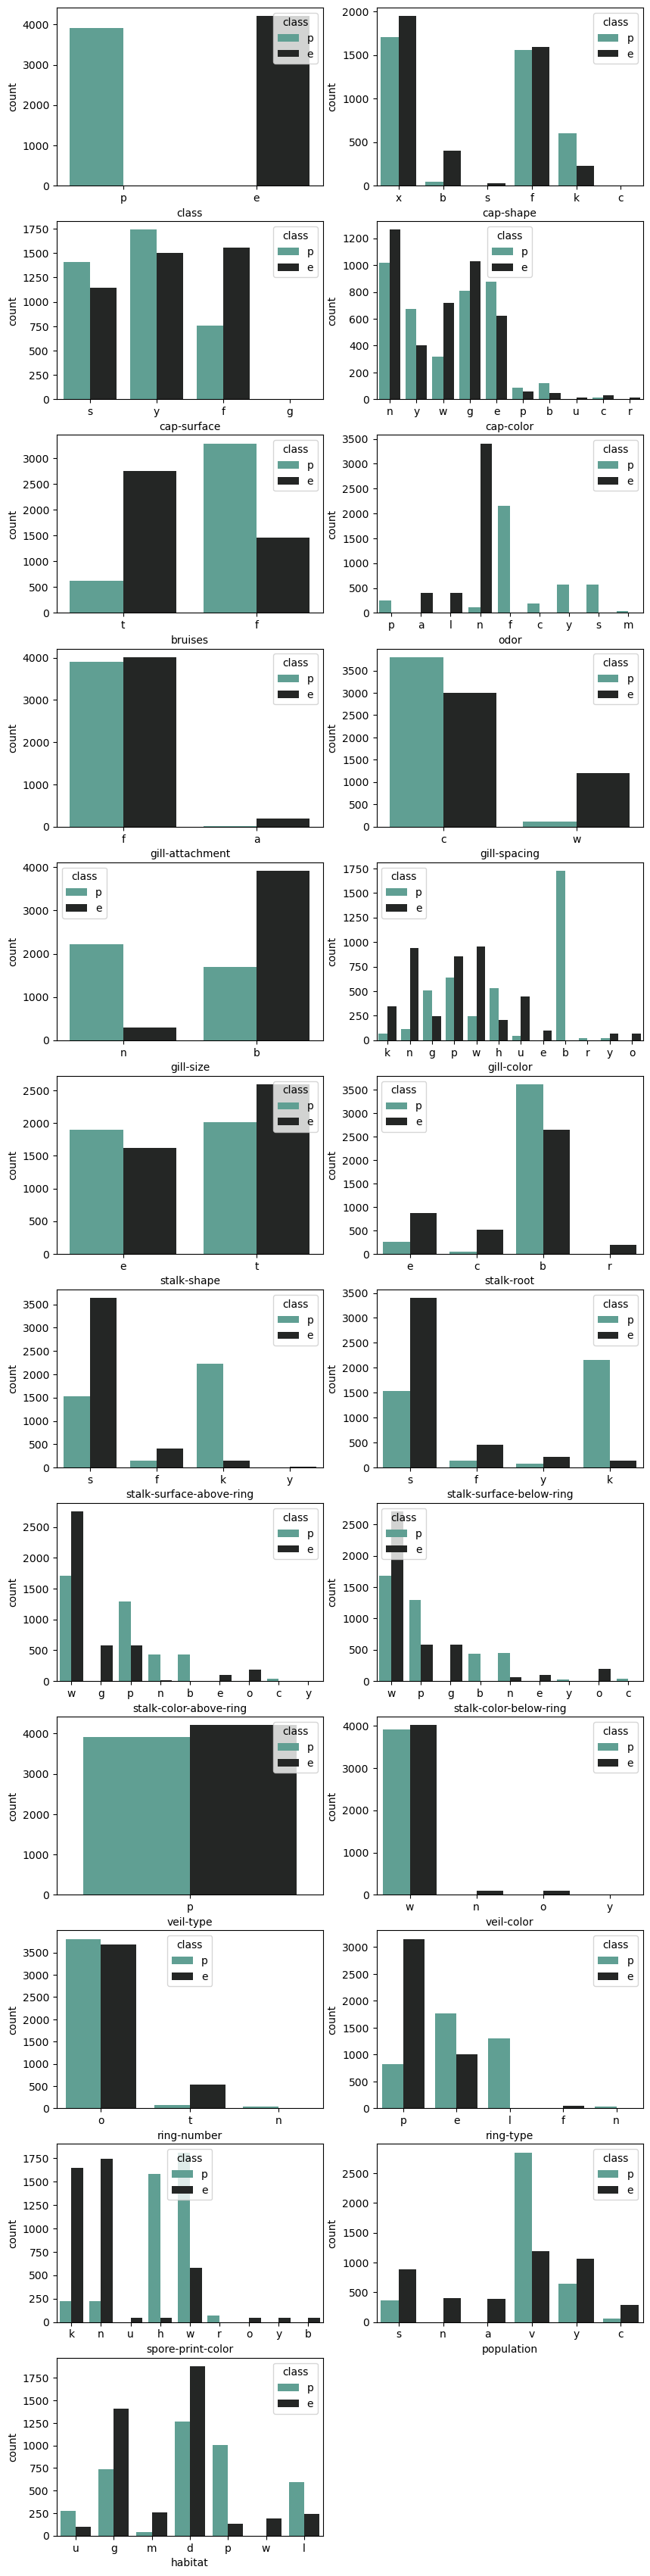

In [138]:
# countplot of the columns with respect ot the class of mushroom
plt.figure(figsize = (10,80))
plot_num = 1
for i in list(df.columns):
    plt.subplot(22,2,plot_num) 
    sns.countplot(df[i], hue = df['class'], palette = 'dark:#5A9_r')
    plot_num+=1
plt.show()

# Encoding

## Label Encoding

In [139]:
# columns for label encoding - class, bruises, gill-attachment, gill-spacing, gill-size, stalk-shape, veil-type
col = ['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'veil-type']
for i in col:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

In [140]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,w,w,0,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,w,w,0,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,w,w,0,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,w,w,0,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,w,w,0,w,o,e,n,a,g


## One Hot Encoding

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int8  
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   int8  
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   int8  
 7   gill-spacing              8124 non-null   int8  
 8   gill-size                 8124 non-null   int8  
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   int8  
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [142]:
print("Columns having categorical datatype : ")
category_col = list(df.select_dtypes(include = ['object']).columns)
print(category_col)

Columns having categorical datatype : 
['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [143]:
df = pd.get_dummies(df, drop_first = True)

In [144]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# MODELLING

In [145]:
# split the data into dependent and independent variable
x = df.drop('class', axis =1)
y = df['class']

In [146]:
x.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [147]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int8

In [148]:
# to check the balance/imbalance of dataset
y.value_counts()  

0    4208
1    3916
Name: class, dtype: int64

In [149]:
# Data is balanced

In [150]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

## Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [152]:
#predictions
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [153]:
# Evaluate the metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [154]:
print(confusion_matrix(y_train,train_pred_lr))
print()
print(confusion_matrix(y_test,test_pred_lr))

[[3366    0]
 [   1 3132]]

[[842   0]
 [  3 780]]


In [155]:
print(classification_report(y_train,train_pred_lr))
print()
print(classification_report(y_test,test_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [156]:
# Lists to store accuracy value
train_accu = [] 
test_accu = []
train_mean = []
test_mean = []

In [157]:
print(accuracy_score(y_train,train_pred_lr))
train_accu.append(accuracy_score(y_train,train_pred_lr))
print()
print(accuracy_score(y_test,test_pred_lr))
test_accu.append(accuracy_score(y_test,test_pred_lr))

0.9998461301738729

0.9981538461538462


In [158]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(lr, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.99846154 0.99538462 1.         0.99846154 1.         1.
 1.         1.         1.         1.        ]

Train Mean Accuracy 0.9992307692307693

Train Max Accuracy 1.0

Test Accuracy [0.99386503 0.99386503 1.         1.         1.         1.
 0.99382716 0.99382716 1.         0.99382716]

Test Mean Accuracy 0.9969211542831176

Test Max Accuracy 1.0


## Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10, max_features = 'auto',min_samples_leaf = 2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=2)

In [160]:
#predictions
train_pred_dtree = dtree.predict(x_train)
test_pred_dtree = dtree.predict(x_test)

In [161]:
print(confusion_matrix(y_train,train_pred_dtree))
print()
print(confusion_matrix(y_test,test_pred_dtree))

[[3328   38]
 [  45 3088]]

[[836   6]
 [ 15 768]]


In [162]:
print(classification_report(y_train,train_pred_dtree))
print()
print(classification_report(y_test,test_pred_dtree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3366
           1       0.99      0.99      0.99      3133

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       842
           1       0.99      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [163]:
print(accuracy_score(y_train,train_pred_dtree))
train_accu.append(accuracy_score(y_train,train_pred_dtree))
print()
print(accuracy_score(y_test,test_pred_dtree))
test_accu.append(accuracy_score(y_test,test_pred_dtree))

0.987228804431451

0.9870769230769231


In [164]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree, x_train, y_train, cv=10)
test_accuracy = cross_val_score(dtree, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.99230769 0.98153846 0.98769231 0.99538462 0.97846154 0.99384615
 1.         0.99692308 0.98461538 1.        ]

Train Mean Accuracy 0.9910769230769232

Train Max Accuracy 1.0

Test Accuracy [0.96319018 0.98773006 0.96932515 1.         1.         0.98765432
 0.98765432 0.99382716 0.98148148 0.98148148]

Test Mean Accuracy 0.9852344164205104

Test Max Accuracy 1.0


## Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf= 1, min_samples_split= 2, random_state=200)
rfr.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=200)

In [166]:
#predictions
train_pred_rfr = rfr.predict(x_train)
test_pred_rfr = rfr.predict(x_test)

In [167]:
print(confusion_matrix(y_train,train_pred_rfr))
print()
print(confusion_matrix(y_test,test_pred_rfr))

[[3366    0]
 [   0 3133]]

[[842   0]
 [  0 783]]


In [168]:
print(classification_report(y_train,train_pred_rfr))
print()
print(classification_report(y_test,test_pred_rfr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [169]:
print(accuracy_score(y_train,train_pred_rfr))
train_accu.append(accuracy_score(y_train,train_pred_rfr))
print()
print(accuracy_score(y_test,test_pred_rfr))
test_accu.append(accuracy_score(y_test,test_pred_rfr))

1.0

1.0


In [170]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rfr, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Train Mean Accuracy 1.0

Train Max Accuracy 1.0

Test Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Mean Accuracy 1.0

Test Max Accuracy 1.0


## XGBOOST

In [171]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [172]:
#predictions
train_pred_xgb = xgb.predict(x_train)
test_pred_xgb = xgb.predict(x_test)

In [173]:
print(confusion_matrix(y_train,train_pred_xgb))
print()
print(confusion_matrix(y_test,test_pred_xgb))

[[3366    0]
 [   0 3133]]

[[842   0]
 [  0 783]]


In [174]:
print(classification_report(y_train,train_pred_xgb))
print()
print(classification_report(y_test,test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [175]:
print(accuracy_score(y_train,train_pred_xgb))
train_accu.append(accuracy_score(y_train,train_pred_xgb))
print()
print(accuracy_score(y_test,test_pred_xgb))
test_accu.append(accuracy_score(y_test,test_pred_xgb))

1.0

1.0


In [176]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
test_accuracy = cross_val_score(xgb, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Train Mean Accuracy 1.0

Train Max Accuracy 1.0

Test Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Mean Accuracy 1.0

Test Max Accuracy 1.0


## KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

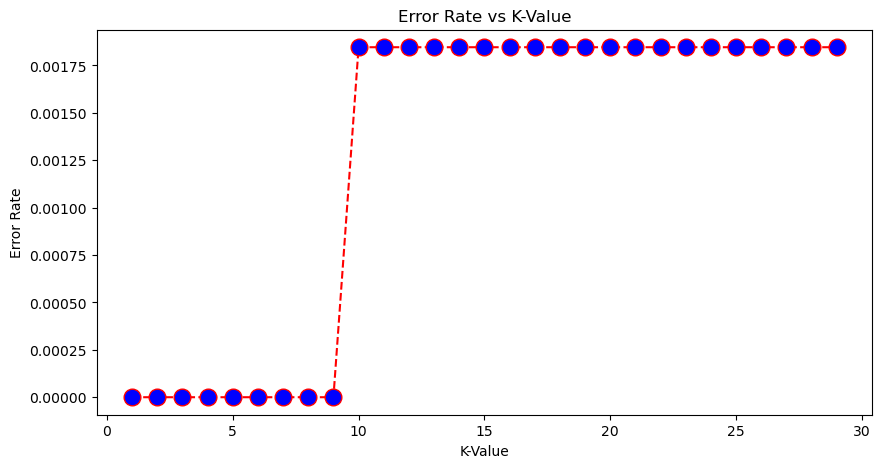

In [179]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30), error_rate, color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.show()

In [180]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [181]:
#predictions
train_pred_knn = knn.predict(x_train)
test_pred_knn = knn.predict(x_test)

In [182]:
print(confusion_matrix(y_train,train_pred_knn))
print()
print(confusion_matrix(y_test,test_pred_knn))

[[3366    0]
 [   0 3133]]

[[842   0]
 [  0 783]]


In [183]:
print(classification_report(y_train,train_pred_knn))
print()
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [184]:
print(accuracy_score(y_train,train_pred_knn))
train_accu.append(accuracy_score(y_train,train_pred_knn))
print()
print(accuracy_score(y_test,test_pred_knn))
test_accu.append(accuracy_score(y_test,test_pred_knn))

1.0

1.0


In [185]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Train Mean Accuracy 1.0

Train Max Accuracy 1.0

Test Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Mean Accuracy 1.0

Test Max Accuracy 1.0


## SVM

In [186]:
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(x_train,y_train)

SVC()

In [187]:
#predictions
train_pred_svm = svm.predict(x_train)
test_pred_svm = svm.predict(x_test)

In [188]:
print(confusion_matrix(y_train,train_pred_svm))
print()
print(confusion_matrix(y_test,test_pred_svm))

[[3366    0]
 [   0 3133]]

[[842   0]
 [  0 783]]


In [189]:
print(classification_report(y_train,train_pred_svm))
print()
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [190]:
print(accuracy_score(y_train,train_pred_svm))
train_accu.append(accuracy_score(y_train,train_pred_svm))
print()
print(accuracy_score(y_test,test_pred_svm))
test_accu.append(accuracy_score(y_test,test_pred_svm))

1.0

1.0


In [199]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(svm, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1.         0.99538462 1.         1.         1.         1.
 1.         1.         1.         1.        ]

Train Mean Accuracy 0.9995384615384616

Train Max Accuracy 1.0

Test Accuracy [1.         0.99386503 1.         1.         1.         1.
 0.99382716 0.99382716 1.         1.        ]

Test Mean Accuracy 0.99815193516625

Test Max Accuracy 1.0


# Finding the best model
 Accuracy Comparison of different algorithms on training data and testing data

In [200]:
algorithm = ['LogisticRegression','DecisionTree','RandomForest', 'XGBOOST','KNN','SVM']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu,'Train Mean':train_mean,'Test Mean':test_mean}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy,Train Mean,Test Mean
LogisticRegression,0.999846,0.998154,0.999231,0.996921
DecisionTree,0.987229,0.987077,0.991077,0.985234
RandomForest,1.000000,1.000000,1.000000,1.000000
XGBOOST,1.000000,1.000000,1.000000,1.000000
KNN,1.000000,1.000000,1.000000,1.000000
SVM,1.000000,1.000000,0.999538,0.998152


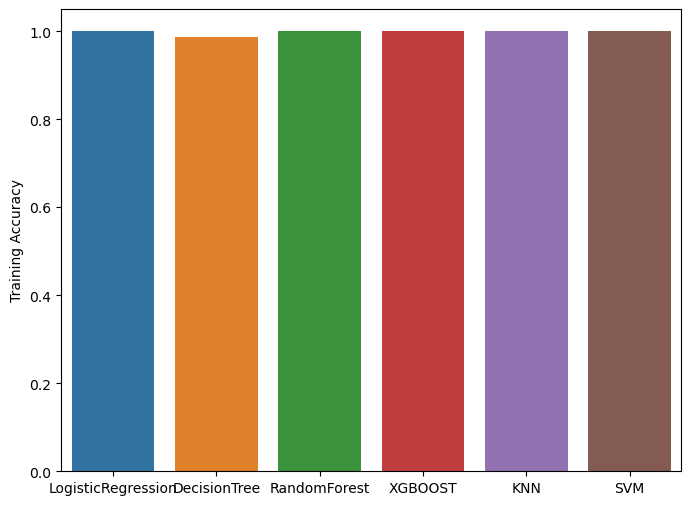

In [205]:
plt.figure(figsize=(8,6))
sns.barplot(model.index, model['Training Accuracy'])
plt.show()

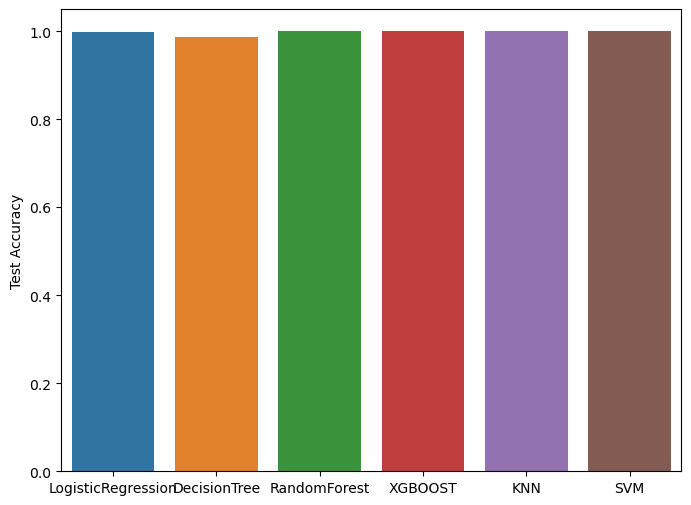

In [202]:
plt.figure(figsize=(8,6))
sns.barplot(model.index, model['Test Accuracy'])
plt.show()

## Coclusion :
1. Random Forest, XGBOOST, KNN are giving overfitting problem.
2. LogisticRegression, DecisionTree, SVM are giving better accuracy.